In [ ]:
!pip install transformers

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=2d9980fb16eec35993bfcbe96256bdcd3db47aa3239a028f1f97a50ed49c2f81
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from transformers import AutoModel, AutoTokenizer
import transformers
import matplotlib.pyplot as plt
from sklearn import metrics

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2024-06-13 13:54:23--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.06s   

2024-06-13 13:54:23 (52.4 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [ ]:
!nvidia-smi

Thu Jun 13 13:54:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   35C    P8              12W /  72W |      4MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


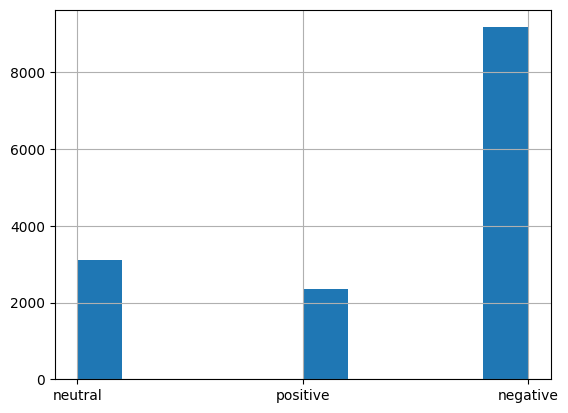

In [ ]:
df=pd.read_csv('AirlineTweets.csv')
df['airline_sentiment'].hist()
df= df[['airline_sentiment', 'text']].copy()
df.head()

In [ ]:
df= df[df.airline_sentiment != 'neutral'].copy()
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)
df['age'] = np.random.randint(18, 81, df.shape[0])
df['BMI'] = np.random.randint(15, 35, df.shape[0])
texts= df['text'].tolist()
df.head()

,airline_sentiment,text,target,age,BMI
1,positive,@VirginAmerica plus you've added commercials t...,1,36,27
3,negative,@VirginAmerica it's really aggressive to blast...,0,66,23
4,negative,@VirginAmerica and it's a really big bad thing...,0,63,32
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0,37,31
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1,49,21


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('airline_sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='target', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='age', y='BMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['target']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('airline_sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='airline_sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('target')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['target']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('target')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('airline_sentiment')):
  _plot_series(series, series_name, i)
  fig.legend(title='airline_sentiment', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['target'].plot(kind='line', figsize=(8, 4), title='target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['BMI'].plot(kind='line', figsize=(8, 4), title='BMI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_17.groupby('airline_sentiment')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('airline_sentiment')
_ = plt.ylabel('text')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['airline_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='airline_sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['airline_sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='target', y='airline_sentiment', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='target', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
class CustomDataset (Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = self.data.text
        self.max_len = max_len
        self.label = self.data.target
        self.csv =  self.data.drop(columns = ['airline_sentiment', 'target', 'text'])


    def __len__(self):
        return len (self.text)

    def __getitem__ (self, index):

        text = str(self.text[index])
        text = " ".join(text.split())
        label = torch.tensor(self.label[index], dtype=torch.float)
        csv = torch.from_numpy(self.csv.iloc[index].to_numpy()).float()

        tokens_test = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True
        )


        ids = torch.tensor(tokens_test['input_ids'], dtype=torch.long)
        mask = torch.tensor(tokens_test['attention_mask'], dtype=torch.long)

        return {
            'ids': ids,
            'mask': mask,
            'label': label,
            'csv': csv,
            }

In [ ]:
bert_clinical = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

class ClinicalCSVModel(nn.Module):
    def __init__(self, num_csv_features, num_classes):
        super(ClinicalCSVModel, self).__init__()
        # Text branch (BERT-Clinical)
        self.bert_clinical = bert_clinical
        # CSV branch
        self.csv_branch = nn.Sequential(
            nn.Linear(num_csv_features, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU()
        )
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(768+16, 64),  # 768 for BERT-Clinical hidden size + 32 from CSV branch
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask, csv_data):
        # Process text data through BERT-Clinical
        _ , text_output = self.bert_clinical(input_ids=input_ids, attention_mask=attention_mask, return_dict=False )
        # Process CSV data
        csv_output = self.csv_branch(csv_data)
        # Combine the outputs
        combined_output = torch.cat((text_output.float(), csv_output.float()), dim=1)
        # Classifier
        return self.sigmoid(self.classifier(combined_output))

# Example usage
num_csv_features = 2  # Number of features from your CSV data
num_classes = 1  # Number of classes for your task

model = ClinicalCSVModel(num_csv_features, num_classes).to(device)

# # Define your input data
# input_ids = test_seq
# attention_mask = test_mask
# csv_data1 = torch_tensor

# # Forward pass
# outputs = model(input_ids[0].unsqueeze(0), attention_mask[0].unsqueeze(0), csv_data1[0].unsqueeze(0))
# outputs

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [ ]:
# Creating the dataset and dataloader for the neural network

train_size = 0.8
train_dataset=df.sample(frac=train_size,random_state=200)
test_dataset=df.drop(train_dataset.index).reset_index(drop=True)
train_dataset = train_dataset.reset_index(drop=True)

bert_clinical = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

print("FULL Dataset: {}".format(df.shape))
print("TRAIN Dataset: {}".format(train_dataset.shape))
print("TEST Dataset: {}".format(test_dataset.shape))

training_set = CustomDataset(train_dataset, tokenizer, 512)
testing_set = CustomDataset(test_dataset, tokenizer, 512)

FULL Dataset: (11541, 5)
TRAIN Dataset: (9233, 5)
TEST Dataset: (2308, 5)


In [ ]:
TRAIN_BATCH_SIZE = 2
VALID_BATCH_SIZE = 4
EPOCHS = 1
LEARNING_RATE = 1e-05

train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCELoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
def train(epoch):
    model.train()
    for _,data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        csv = data['csv'].to(device, dtype = torch.float)
        labels = data['label'].to(device, dtype = torch.float)

        outputs = model(ids, mask, csv)

        optimizer.zero_grad()
        loss = loss_fn(outputs, labels.unsqueeze(-1))
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [ ]:
for epoch in range(5):
    train(epoch)

Epoch: 0, Loss:  0.8070238828659058
Epoch: 1, Loss:  0.047330018132925034
Epoch: 2, Loss:  0.23575814068317413
Epoch: 3, Loss:  0.0014626756310462952
Epoch: 4, Loss:  0.0024885565508157015


In [ ]:
def validation(epoch):
    model.eval()
    fin_labels=[]
    fin_outputs=[]

    with torch.no_grad():
        for _, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            csv = data['csv'].to(device, dtype = torch.float)
            labels = data['label'].to(device, dtype = torch.float)
            outputs = model(ids, mask, csv)
            fin_labels.extend(labels.cpu().detach().numpy().tolist())
            fin_outputs.extend(outputs.cpu().detach().numpy().tolist())
    return fin_outputs, fin_labels

In [ ]:
for epoch in range(1):
    outputs, labels = validation(epoch)
    outputs1 = np.array(outputs) >= 0.5
    accuracy = metrics.accuracy_score(labels, outputs1)
    f1_score_micro = metrics.f1_score(labels, outputs1, average='micro')
    f1_score_macro = metrics.f1_score(labels, outputs1, average='macro')
    fpr, tpr, thresholds = metrics.roc_curve(labels, outputs)
    roc_auc = metrics.auc(fpr, tpr)
    print(f"Accuracy Score = {accuracy}")
    print(f"F1 Score (Micro) = {f1_score_micro}")
    print(f"F1 Score (Macro) = {f1_score_macro}")
    print(f"AUC = {roc_auc}")

Accuracy Score = 0.9432409012131716
F1 Score (Micro) = 0.9432409012131716
F1 Score (Macro) = 0.9093665569225853
AUC = 0.9593094929740467


In [ ]:
# Convert token IDs to tokens
tokens = tokenizer.convert_ids_to_tokens(testing_set[1]['ids'].to(device))

# Join the tokens to form the text
text = ' '.join(tokens).replace(' ##', '')

print(text)

[CLS] @ virginamerica seriously would pay $ 30 a flight for seats that didn ' t have this playing . it ' s really the only bad thing about flying va [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

In [ ]:
outputs = model(testing_set[2]['ids'].unsqueeze(0).to(device), testing_set[2]['mask'].unsqueeze(0).to(device), testing_set[2]['csv'].unsqueeze(0).to(device))
print(outputs)
print(testing_set[2]['label'])

tensor([[0.9955]], device='cuda:0', grad_fn=<SigmoidBackward0>)
tensor(1.)


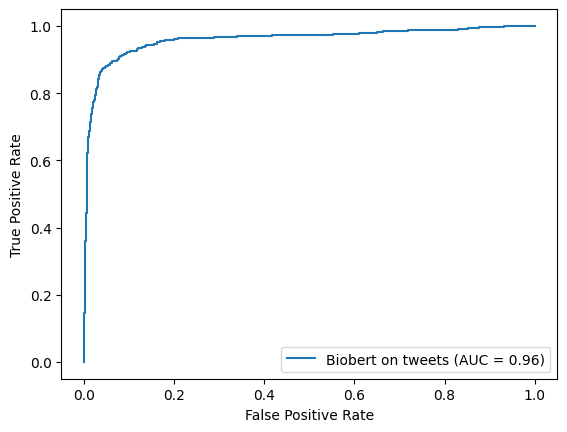

In [ ]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Biobert on tweets')
display.plot()


In [ ]:
        text = str(self.text[index])
        text = " ".join(text.split())
        label = torch.tensor(self.label[index], dtype=torch.float)
        csv = torch.from_numpy(self.csv.iloc[index].to_numpy()).float()

        tokens_test = tokenizer.encode_plus(text,None, add_special_tokens=True, max_length=self.max_len, padding='max_length',return_token_type_ids=True)

In [ ]:
from lime.lime_text import LimeTextExplainer
# Other imports for your model, tokenizer, etc.

# Assume csv_data is your fixed CSV input for the model
csv_data = testing_set[1]['csv']

# Define a prediction function that handles both text and CSV data
def multimodal_predict_proba(texts):

    tokens_test = tokenizer.encode_plus(text,None, add_special_tokens=True, max_length=512, padding='max_length',return_token_type_ids=True)
    ids = torch.tensor(tokens_test['input_ids'], dtype=torch.long)
    mask = torch.tensor(tokens_test['attention_mask'], dtype=torch.long)

    predictions = model(ids.unsqueeze(0).to(device), mask.unsqueeze(0).to(device), csv_data.to(device))

    # Return prediction probabilities
    return predictions

# Initialize LIME explainer for text
explainer = LimeTextExplainer(class_names=['Class1', 'Class2'])

# Example text to explain
text_instance = "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA"

# Generate explanation for the text part
exp = explainer.explain_instance(text_instance, multimodal_predict_proba,  num_features=6)

# Display the explanation
exp.show_in_notebook(text=True)

RuntimeError: Tensors must have same number of dimensions: got 2 and 1

In [ ]:
text = "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying VA"
tokens_test = tokenizer.encode_plus(text,None, add_special_tokens=True, max_length=512, padding='max_length',return_token_type_ids=True)
ids = torch.tensor(tokens_test['input_ids'], dtype=torch.long)
mask = torch.tensor(tokens_test['attention_mask'], dtype=torch.long)

mask.shape

torch.Size([512])